In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
test_split = 0.3
max_depth = 3

In [3]:
data = load_wine()
list_fl = data.target_names
x = data.data
y = data.target

In [4]:
list_features  = data.feature_names
len(list_features),len(x[0])

(13, 13)

In [5]:
df = pd.DataFrame(x, columns=data.feature_names)
df_temp = df.copy()
df_temp['Y'] = y
df_temp
  

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


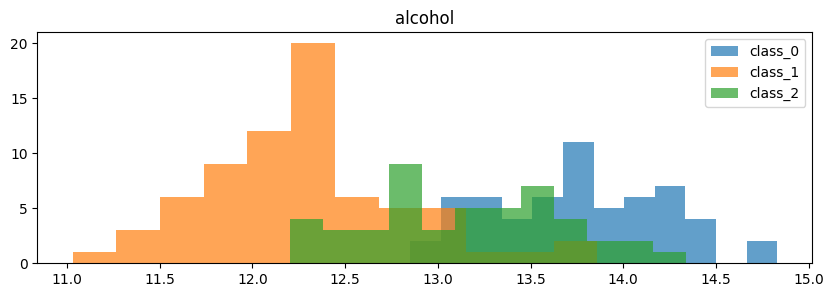

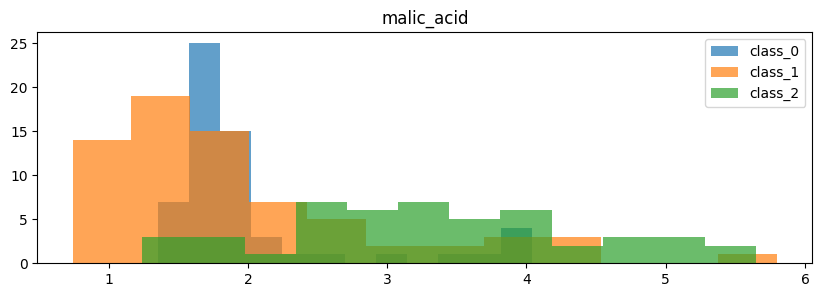

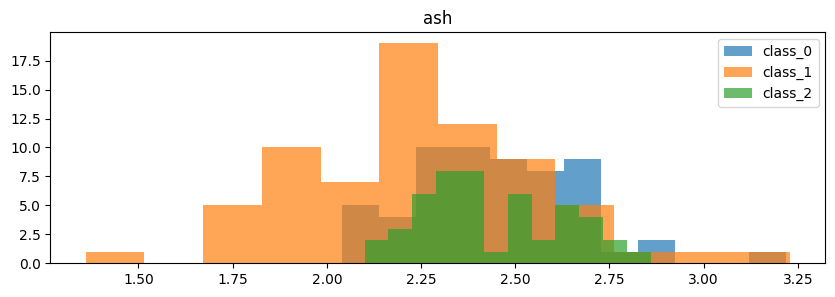

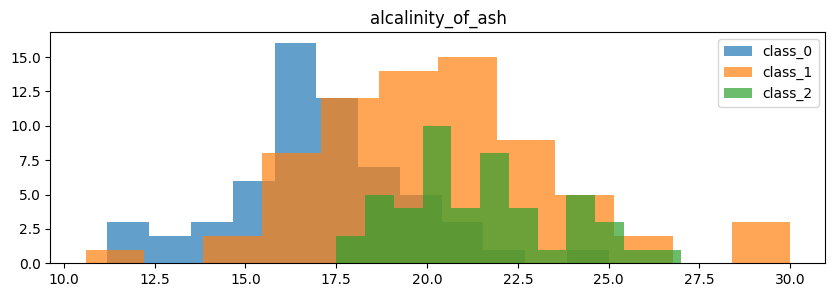

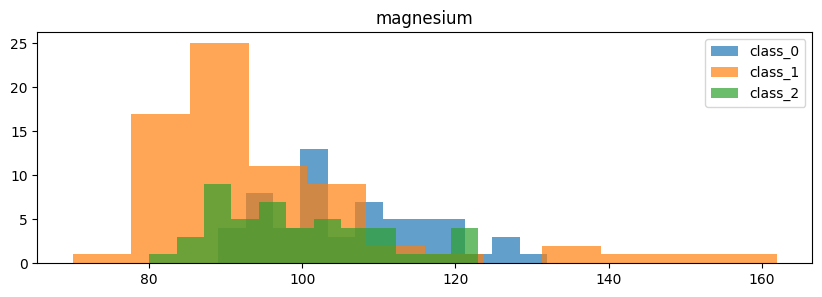

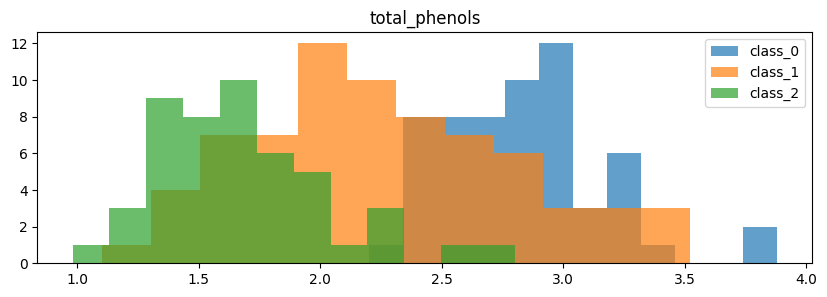

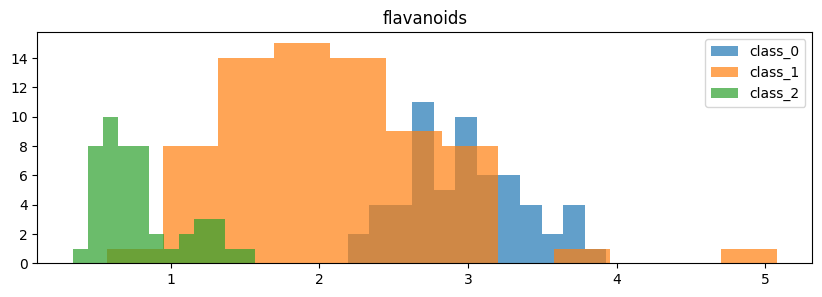

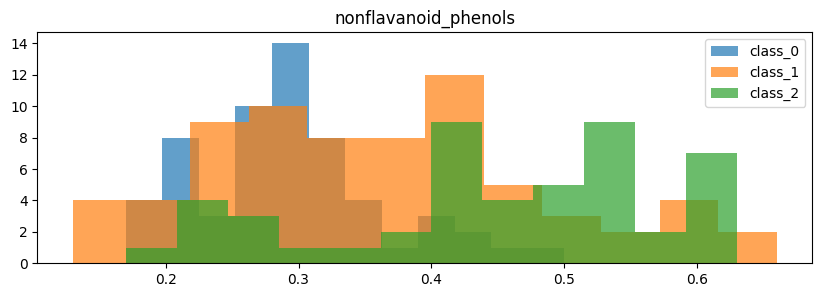

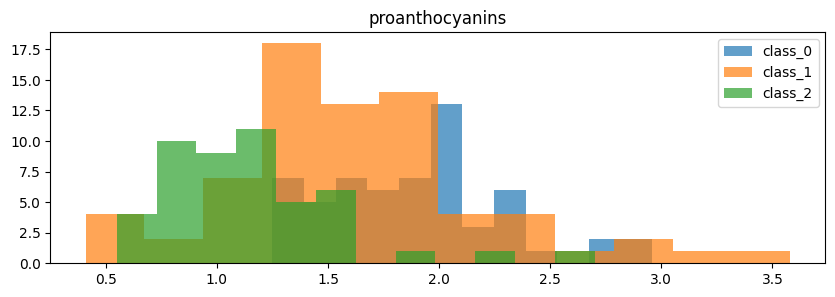

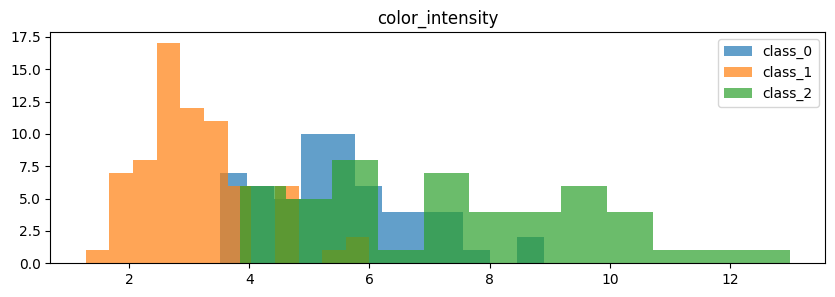

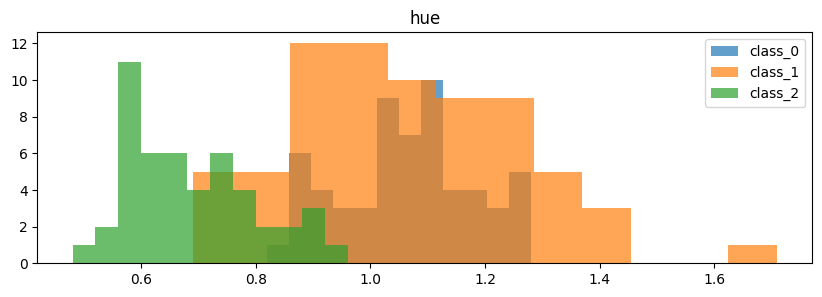

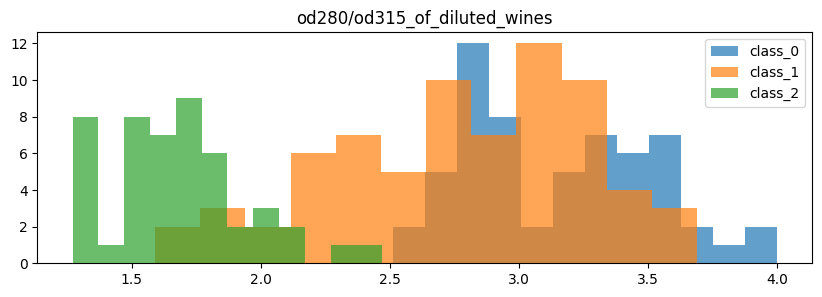

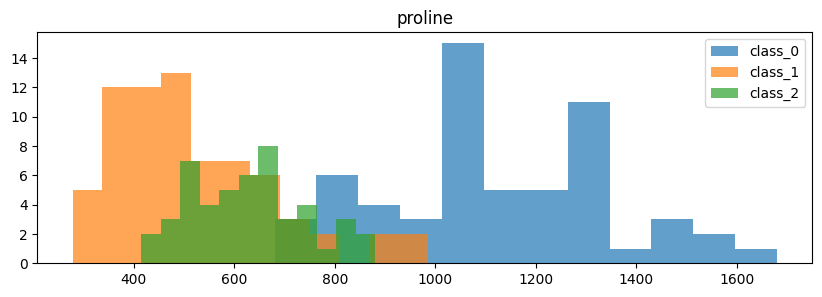

In [6]:
for f in list_features:
    plt.figure(figsize=(10,3))
    for i in range(len(list_fl)):
        plt.hist(df_temp[df_temp['Y']==i][f], bins=12, label=list_fl[i], alpha=0.7)
    plt.legend()
    plt.title(f)
    plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=test_split, random_state=42)

In [8]:
model = RandomForestClassifier(random_state=42, n_estimators = 100) 

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
predictions = model.predict(x_test)

In [10]:
predictions[:5], list(map( lambda x: list_fl[x], list(predictions)))[:5]

(array([0, 0, 2, 0, 1]),
 ['class_0', 'class_0', 'class_2', 'class_0', 'class_1'])

In [11]:
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

report = classification_report(y_test, predictions, target_names=list_fl)
print(report)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



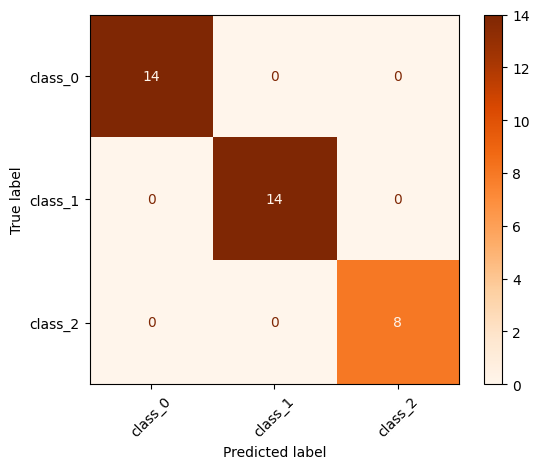

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
show_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=list_fl)
show_cm.plot(xticks_rotation=45, cmap='Oranges')

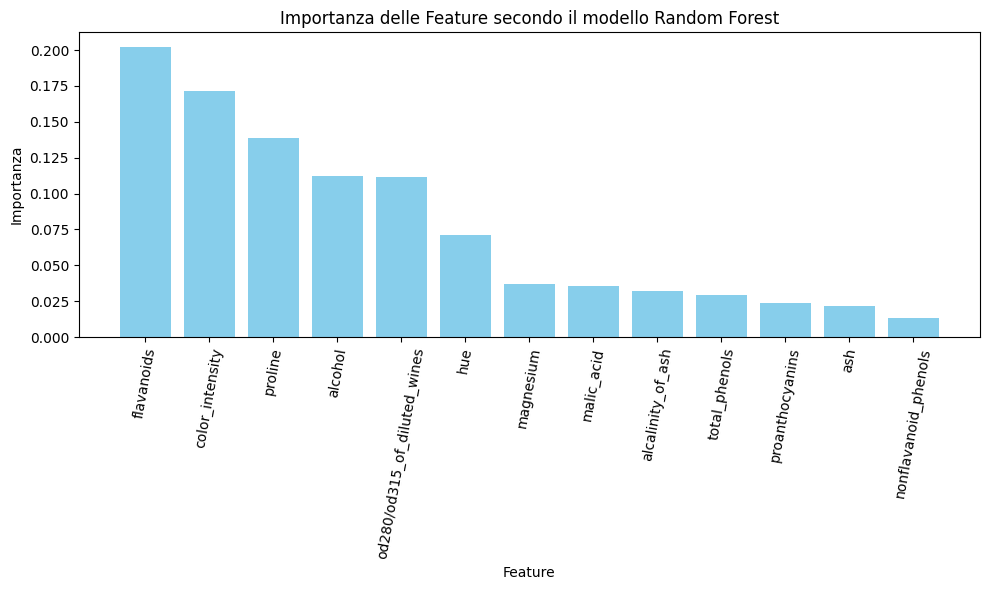

In [13]:
# Importanza delle feature
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importances)[::-1]
list_features = np.array(list_features)
plt.bar(df.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xticks(rotation=80)
plt.xlabel('Feature')
plt.ylabel('Importanza')
plt.title('Importanza delle Feature secondo il modello Random Forest')
plt.tight_layout()

plt.show()

In [14]:
# # Importiamo le librerie necessarie
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_wine
# from sklearn.model_selection import train_test_split

# # Caricamento del dataset Wine
# wine = load_wine()
# X = pd.DataFrame(wine.data, columns=wine.feature_names)
# y = wine.target

# # Suddividiamo il dataset in training e test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Creazione e addestramento del modello Random Forest
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_model.fit(X_train, y_train)

# # Importanza delle feature
# feature_importances = rf_model.feature_importances_

# # Creazione del grafico a barre
# plt.figure(figsize=(10, 6))
# sorted_idx = np.argsort(feature_importances)[::-1]
# plt.bar(X.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Importanza')
# plt.title('Importanza delle Feature secondo il modello Random Forest')
# plt.tight_layout()

# plt.show()
